In [1]:

import warnings
warnings.filterwarnings("ignore")

import os,sys

sys.path.append(os.path.abspath(os.path.join('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM')))

sys.path.append(os.path.abspath(os.path.join('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM\\1_cluster_demand_prediction\data\weather_data')))
sys.path.append(os.path.abspath(os.path.join('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\2_freq_nbinom_LSTM\1_cluster_demand_prediction\data\demand_data')))



from pytorch_forecasting.data.encoders import TorchNormalizer

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
import pytorch_lightning as pl
from pytorch_forecasting import NegativeBinomialDistributionLoss, DeepAR
import torch
from pytorch_forecasting.data.encoders import TorchNormalizer
import os,sys
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from scipy.signal import find_peaks
import operator
import statsmodels.api as sm
from itertools import combinations
import pickle

In [ ]:
######### Viziualize and choose cluster here ######################
region_demand =  pd.read_csv('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM\\1_cluster_demand_prediction\data\demand_data\\tampines_region_demand_medium_dataset.csv')
for i in region_demand.columns:
    plt.title(i)
    plt.plot(region_demand[i])
    plt.show()

# Visualize inflow
region_inflow = pd.read_csv('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM\\1_cluster_demand_prediction\data\demand_data\\tampines_region_inflow_medium_dataset.csv')
for i in region_inflow.columns:
    plt.title(i)
    plt.plot(region_inflow[i])
    plt.show()

######### Viziualize and choose cluster here ######################

In [ ]:
##### Decompose ALL numerical time series ###### 
for c in region_demand.columns:
    add = seasonal_decompose(region_demand[c], model='additive', period=24)
    add.plot()
    plt.title(c)
    plt.show()
    ## mul = seasonal_decompose(all_num_ts[c], model='multiplicative', period=1)
    ## mul.plot()
    ## plt.show()
##### Decompose ALL numerical time series ###### 

In [6]:
"""
set inputs here

"""
chosen = '175'
chosen_clstr = 'clstr_' + chosen # response cluster


In [ ]:
plt.figure(figsize=(25,5))
plt.plot(region_demand[chosen])
plt.title(chosen)
plt.show()

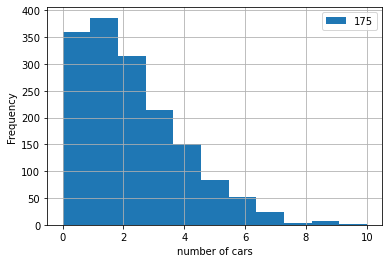

0.22556390977443608
0.24185463659147868
0.19674185463659147
0.13408521303258145
0.09461152882205513
0.05263157894736842
0.03195488721804511
0.015037593984962405
0.002506265664160401
0.0043859649122807015
0.0006265664160401002
sum =  1596
Optimization terminated successfully.
         Current function value: 1.869641
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
                     NegativeBinomial Regression Results                      
Dep. Variable:                    175   No. Observations:                 1596
Model:               NegativeBinomial   Df Residuals:                     1595
Method:                           MLE   Df Model:                            0
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:               1.056e-11
Time:                        13:10:22   Log-Likelihood:                -2983.9
converged:                       True   LL-Null:                       -2983.9
Covariance Type:            nonrobust   

In [8]:
region_demand[chosen].hist(bins=region_demand[chosen].nunique(), grid=True,legend=True)
plt.ylabel('Frequency')
plt.xlabel('number of cars')
plt.show()


for category in range(11):
    print(len([1 for i in range(len(region_demand[chosen])) if region_demand[chosen].iloc[i] == category ])/1596) # count the number of cars in each category
print('sum = ', 360 + 386+314+214+151+84+51+24+4+7+1 )
import scipy


import statsmodels.api as sm
X = np.ones_like(region_demand[chosen])
res = sm.NegativeBinomial(region_demand[chosen],X).fit(start_params=[1,1])

print(res.summary())

k = 1/0.3519
p = k / ((10**0.7139) + k)

print(k,p)

In [ ]:
"""
Data Visulaization

"""

########## Read DATA  start ######################

########## Weather data ##########
tampines_clstr_175__weather =  pd.read_csv('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM\\1_cluster_demand_prediction\data\weather_data\\tampines_clstr_175_weather_medium_dataset.csv')

temp_clstr_175 = tampines_clstr_175__weather["temp_clstr_175"]
hum_clstr_175 = tampines_clstr_175__weather["hum_clstr_175"]
#wind_clstr_175 = tampines_region_weather["wind_clstr_175"]
#wea_clstr_175 = tampines_region_weather["wea_clstr_175"]
wea_desc_clstr_175 = tampines_clstr_175__weather["wea_desc_clstr_175"]
########## Weather data ##########



########## demand data clusters ##########
tampines_region_demand =  pd.read_csv('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM\\1_cluster_demand_prediction\data\demand_data\\tampines_region_demand_medium_dataset.csv')
col_names = list(tampines_region_demand.columns)
reg_dem = {}
for c in col_names:
    reg_dem[c] = tampines_region_demand[c]
########## demand data clusters ##########

########## Read DATA  end ######################




########## Visualize DATA  start ######################

######### Visualize Weather DATA  ######################
plt.plot(temp_clstr_175)
plt.ylabel("temperature/kelvin")
plt.show()

plt.plot(hum_clstr_175)
plt.ylabel("humidity/%")
plt.show()

# plt.plot(wind_clstr_175)
# plt.ylabel("wind/ (m/s)")
# plt.show()

# plt.plot(wea_clstr_175)
# plt.ylabel("weather brief")
# plt.show()

plt.plot(wea_desc_clstr_175)
plt.ylabel("weather detailed")
plt.show()
######### Visualize Weather DATA  ######################

######### Visualize demand DATA  ######################
for c in col_names:
    plt.plot(tampines_region_demand[c])
    plt.ylabel(f"cluster {c}")
    plt.show()
######### Visualize demand DATA  ######################

########## Visualize DATA  end ######################

In [10]:
######## combine all numerical time series into a dictionary ##########
# all_num_ts = {'temp_clstr_175':temp_clstr_175,'hum_clstr_175':hum_clstr_175, 'wind_clstr_175':wind_clstr_175}
# for c in col_names:
#     all_num_ts['clstr_'+c] = reg_dem[c]

all_num_ts = {'temp_clstr_175':temp_clstr_175,'hum_clstr_175':hum_clstr_175}
for c in col_names:
    all_num_ts['clstr_'+c] = reg_dem[c]

######## combine all numerical time series into a dictionary ##########


In [11]:
"""
Data Analysis

# Need to check stationarity of all covariates.
# we do not stationarize non-stationary time series immediately,
# we do only if test error for the
# cluster is bad
"""

###### Check staionarity of ALL numerical time series ###### 
cov_stationary_flag = {}
col_names = all_num_ts.keys()

for c in col_names:
	result = adfuller(all_num_ts[c])
	if result[0] < (result[4]["1%"] and result[4]["5%"] and result[4]["10%"] ):
		cov_stationary_flag[c] = 1 # stationary
	else:
		cov_stationary_flag[c] = 0		

print('stationarity: ',cov_stationary_flag)
###### Check staionarity of ALL numerical time series ###### 

stationarity:  {'temp_clstr_175': 1, 'hum_clstr_175': 1, 'clstr_126': 1, 'clstr_166': 1, 'clstr_167': 1, 'clstr_168': 1, 'clstr_169': 1, 'clstr_170': 1, 'clstr_171': 1, 'clstr_172': 1, 'clstr_173': 1, 'clstr_174': 1, 'clstr_175': 1, 'clstr_175_lag_168': 1, 'clstr_175_lag_336': 1}


In [ ]:
##### Decompose ALL numerical time series ###### 

period = 24
print('Sunday')
print(pd.Timestamp(year=2021, month=10, day=17, hour=20 ), ' + period = ', period)

start = 0
end = -1

for c in col_names:
    if c != 'clstr_175':
        continue
    add = seasonal_decompose(all_num_ts[c].iloc[start:end], model='additive', period=period,two_sided=True)
    add.plot(seasonal=False,resid=False)
    plt.title(c)
    plt.xticks(np.arange(start, len(all_num_ts[c].iloc[:end])+1, 168))
    add.plot(trend=False,observed=False)
    plt.show()
    ## mul = seasonal_decompose(all_num_ts[c], model='multiplicative', period=1)
    ## mul.plot()
    ## plt.show()
##### Decompose ALL numerical time series ######




In [ ]:
##### box plot of ALL numerical time series ###### 
win_size = 168
for c in col_names:
    ts_split = np.array_split(all_num_ts[c],len(all_num_ts[c])//win_size)
    plt.boxplot(ts_split)
    plt.title(c)
    plt.show()
##### box plot of ALL numerical time series ###### 

In [ ]:
###### ACF plot of ALL numerical time series ###### 
peak_idx_acf = np.array([])
view_lags = 169
for c in col_names:
    acf1 = acf(all_num_ts[c], nlags=view_lags)
    peak_idx_high = np.array((find_peaks(acf1,height=(-0.7,0.7))[0]),dtype=int)
    peak_idx_low = np.array((find_peaks(-1*acf1,height=(-0.7,0.7))[0]),dtype=int)
    peak_idx_acf = np.sort(np.concatenate((peak_idx_high, peak_idx_low),axis=0))
    print(f'peak index: {peak_idx_acf}')
    x = list(range(0,len(acf1)))
    plt.figure(figsize=(10,10))
    plt.plot(x,[1.96/np.sqrt(len(x))]*len(x), 'r')
    plt.plot(x,[(-1*1.96)/np.sqrt(len(x))]*len(x),'r')
    plt.plot(x,acf1)
    plt.xticks(np.arange(0, len(x),12))
    plt.scatter(peak_idx_high,acf1[peak_idx_high],color='red')
    plt.scatter(peak_idx_low,acf1[peak_idx_low],color='red')
    plt.title(c)
    plt.show()

# use peak_idx_acf to pick the first 50 lags

###### ACF plot of ALL numerical time series ###### 

In [ ]:
###### PACF plot of ALL numerical time series ###### 
peak_idx_pacf = np.array([])
view_lags = 180
for c in col_names:
    pacf1 = pacf(all_num_ts[c], nlags=view_lags)
    peak_idx_high = np.array((find_peaks(pacf1,height=(-0.4,0.4))[0]),dtype=int)
    peak_idx_low = np.array((find_peaks(-1*pacf1,height=(-0.4,0.4))[0]),dtype=int)
    peak_idx_pacf = np.sort(np.concatenate((peak_idx_high, peak_idx_low),axis=0))
    print(f'peak index: {peak_idx_pacf}')
    x = list(range(0,len(pacf1)))
    plt.figure(figsize=(10,10))
    plt.plot(x,[1.96/np.sqrt(len(x))]*len(x), 'r')
    plt.plot(x,[(-1*1.96)/np.sqrt(len(x))]*len(x),'r')
    plt.plot(x,pacf1)
    plt.xticks(np.arange(0, len(x),12))
    plt.scatter(peak_idx_high,pacf1[peak_idx_high],color='red')
    plt.scatter(peak_idx_low,pacf1[peak_idx_low],color='red')
    plt.title(c)
    plt.show()

# use peak_idx_pacf to pick the first 50 lags

###### PACF plot of ALL numerical time series ######

saturday 8 pm to sunday 8 pm


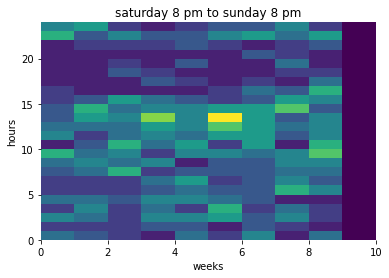

In [16]:
############ Seasonal plot ############ 

### create a pivot table for plot of same day for 9 weeks ###

df = pd.DataFrame()
win_size = 168


extended_ts = all_num_ts['clstr_'+chosen]
extended_ts = extended_ts.to_numpy()

for i in range(extended_ts.shape[0], 1680,1): # 10 weeks to include the data of some days available in heat map
    extended_ts = np.append(extended_ts, -1)

extended_ts = pd.Series(extended_ts)


for i in range(len(extended_ts)//win_size ):
    df['week_'+str(i+1)] = extended_ts[i*win_size:(i+1)*win_size].to_numpy()


string = 'saturday 8 pm to sunday 8 pm'
print(string)
start = 144
end = 168 # day so increment by 24
df_piv = pd.pivot_table(df[start:end],values=df.columns.to_list(),index=df.index[start:end])
df_piv = df_piv.reindex(df.columns.to_list(), axis=1)
#df_piv.plot(figsize=(25,8),xticks=df.index[start:end],linestyle='--', marker='o')


xgrid = np.arange(11)
ygrid = np.arange(25)
xgrid

fig, ax = plt.subplots()
ax.set_title(string)
ax.set_xlabel('weeks')
ax.set_ylabel('hours')
ax.pcolormesh(xgrid, ygrid, df_piv)
ax.set_frame_on(False) # remove all spines

############ Seasonal plot ############ 

week 9, day 1 starts on sunday 8 pm


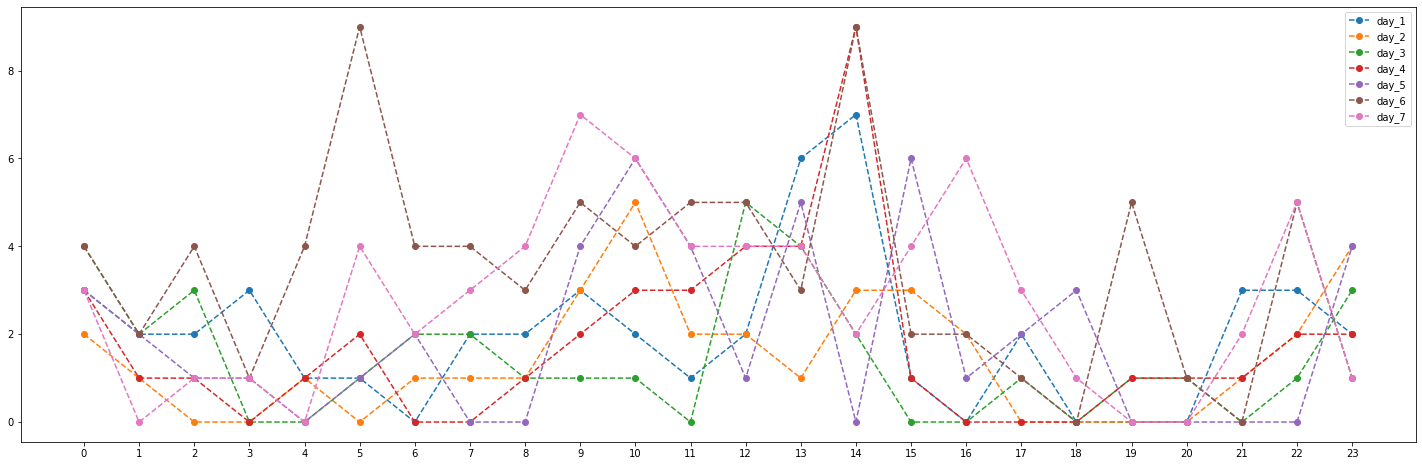

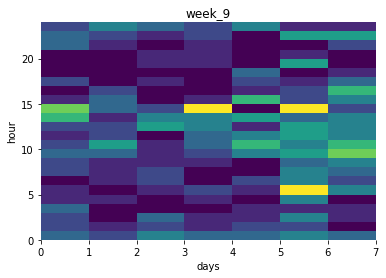

In [17]:
############ Seasonal plot using heat maps ############ 

### create a pivot table for plot all days in a week for 9 weeks ###

df = pd.DataFrame()
win_size = 24

start = 1344 
end = 1512 # week so increment by 168
week = 9
new_ts = all_num_ts['clstr_'+chosen][start:end]

for i in range(len(new_ts)//win_size):
    df['day_'+str(i+1)] = new_ts[i*win_size:(i+1)*win_size].to_numpy()

print('week ' + str(week)+ ', day 1 starts on sunday 8 pm')
df_piv = pd.pivot_table(df,values=df.columns,index=df.index)
df_piv.plot(figsize=(25,8),xticks=df.index,linestyle='--', marker='o')

xgrid = np.arange(8)
ygrid = np.arange(25)
xgrid

fig, ax = plt.subplots()
ax.set_title('week_' + str(week))
ax.set_xlabel('days')
ax.set_ylabel('hour')
ax.pcolormesh(xgrid, ygrid, df_piv)
ax.set_frame_on(False) # remove all spines

############ Seasonal plot using heat maps ############ 

In [ ]:
###### FFT plot of ALL numerical time series ###### 
for c in col_names:
    # apply fast fourier transform and take absolute values
    x = all_num_ts[c]

    ft = np.fft.rfft(x)
    freqs = np.fft.rfftfreq(len(x), 1) # Get frequency axis from the time axis
    mags = abs(ft) # We don't care about the phase information here
    plt.figure(figsize=(25,5))
    plt.xticks(np.arange(min(x), max(x)+1, 0.01))
    plt.plot(freqs, mags)
    plt.title(c)
    plt.show()

    idx = np.argsort(-1*mags)
    print('Largest magnitude periods in hours' )
    print(1/freqs[idx[1:10]])

###### FFT plot of ALL numerical time series ###### 

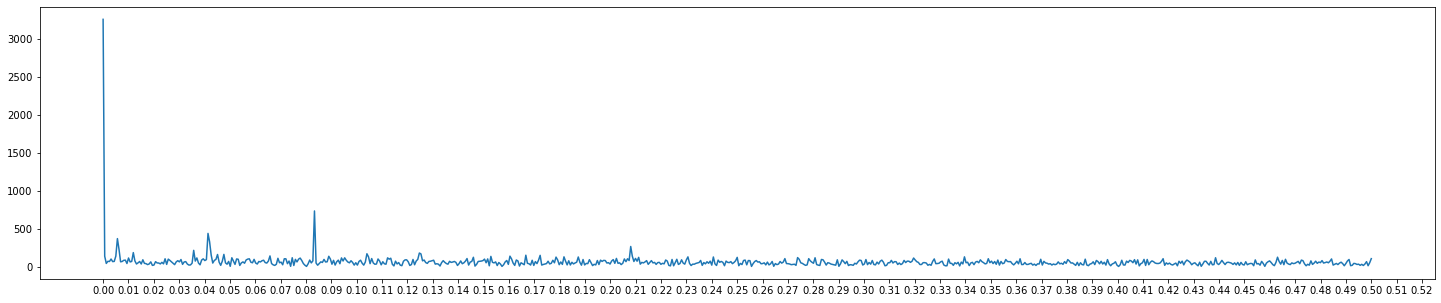

Largest magnitude period =  12.0  hours
Next largest magnitude periods in hours
[ 12.          24.18181818 177.33333333  23.82089552   4.80722892
 159.6         28.          84.           8.0201005 ]


In [18]:
###### FFT plot of entire chosen time series ###### 

x = all_num_ts['clstr_'+chosen]

ft = np.fft.rfft(x)
freqs = np.fft.rfftfreq(len(x), 1) # Get frequency axis from the time axis
mags = abs(ft) # We don't care about the phase information here
plt.figure(figsize=(25,5))
plt.xticks(np.arange(min(x), max(x)+1, 0.01))
plt.plot(freqs, mags)
plt.show()

inflection = np.diff(np.sign(np.diff(mags)))
peaks = (inflection < 0).nonzero()[0] + 1
peak = peaks[mags[peaks].argmax()]
signal_freq = freqs[peak] #
print('Largest magnitude period = ',1/signal_freq, ' hours')


idx = np.argsort(-1*mags)
print('Next largest magnitude periods in hours' )
print(1/freqs[idx[1:10]])

###### FFT plot of entire chosen time series ###### 

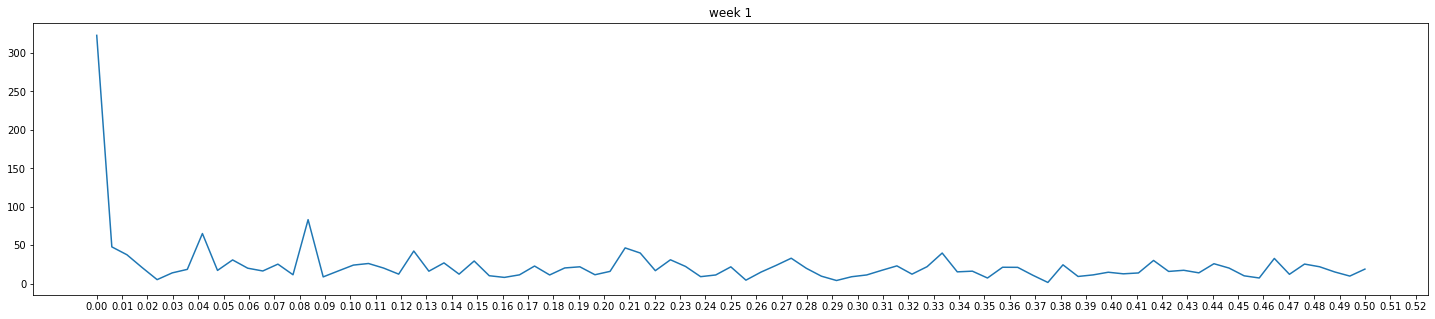

Largest magnitude period =  12.0  hours
Next largest magnitude periods in hours
[ 12.          24.         168.           4.8          8.
   4.66666667   3.          84.           3.65217391]


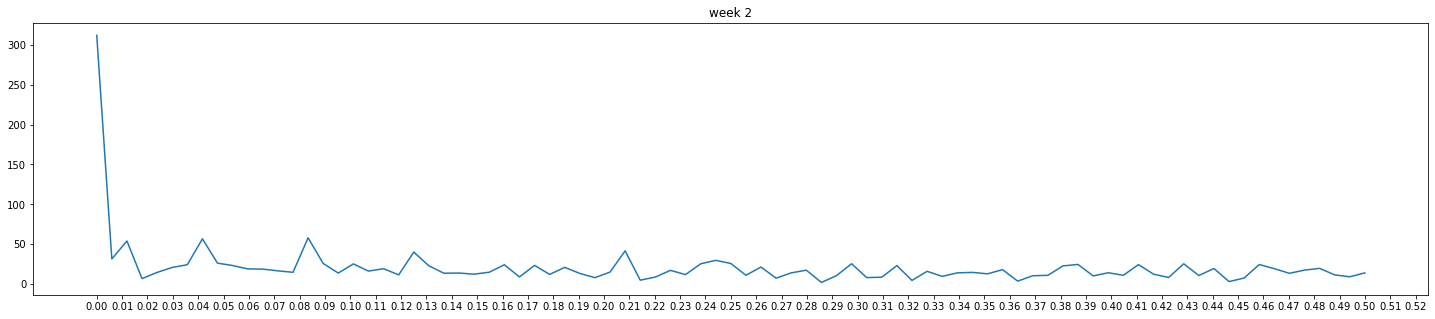

Largest magnitude period =  12.0  hours
Next largest magnitude periods in hours
[ 12.          24.          84.           4.8          8.
 168.           4.09756098  21.           4.        ]


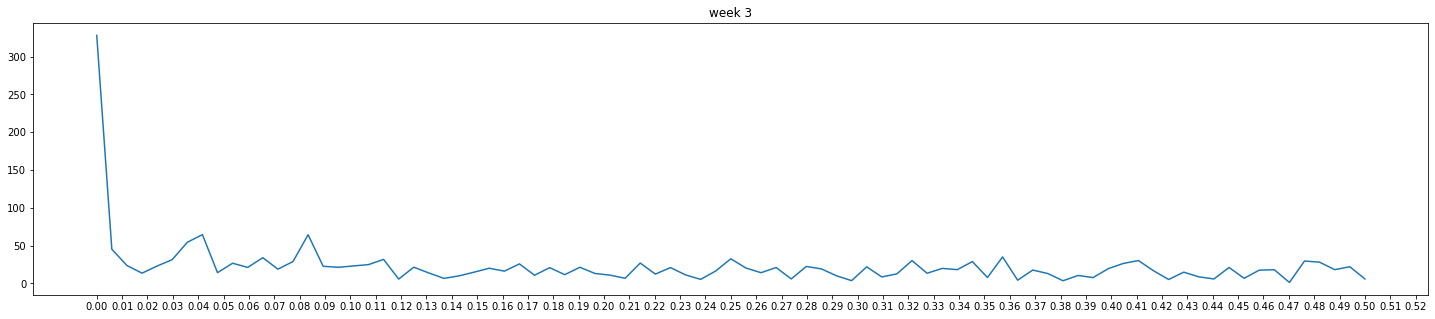

Largest magnitude period =  24.0  hours
Next largest magnitude periods in hours
[ 24.          12.          28.         168.           2.8
  15.27272727   4.           8.84210526  33.6       ]


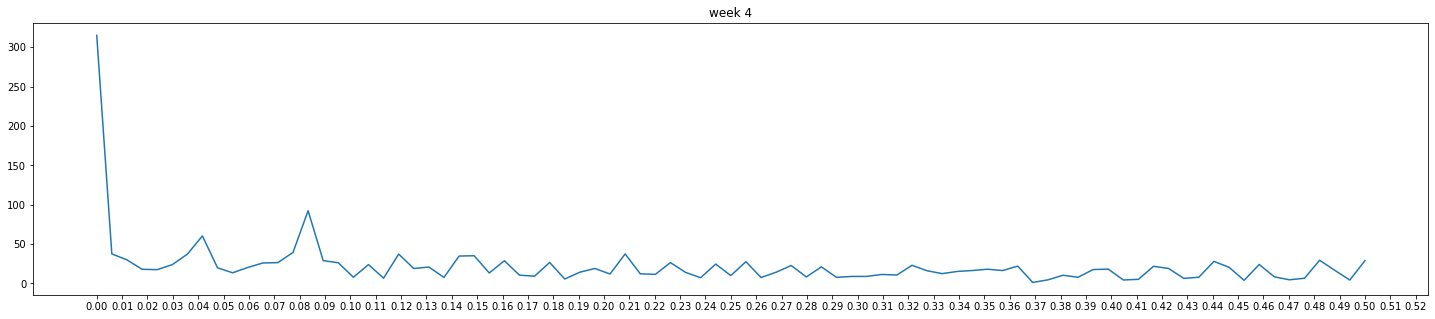

Largest magnitude period =  12.0  hours
Next largest magnitude periods in hours
[ 12.          24.          12.92307692 168.           4.8
   8.4         28.           6.72         7.        ]


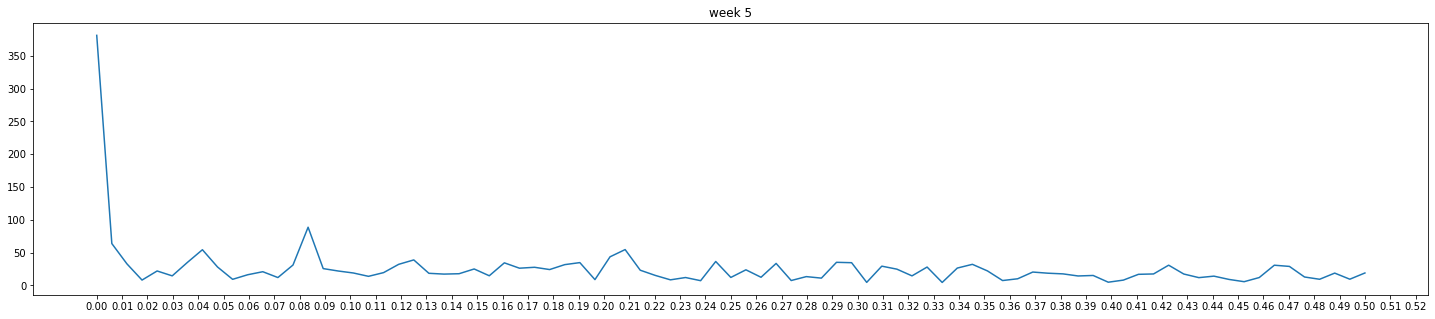

Largest magnitude period =  12.0  hours
Next largest magnitude periods in hours
[ 12.         168.           4.8         24.           4.94117647
   8.           4.09756098   3.42857143  28.        ]


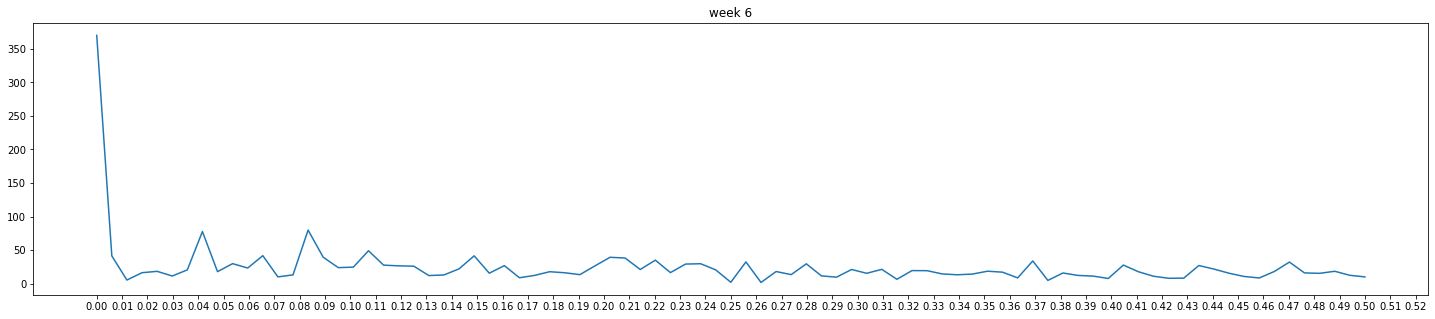

Largest magnitude period =  12.0  hours
Next largest magnitude periods in hours
[ 12.          24.           9.33333333  15.27272727   6.72
 168.          11.2          4.94117647   4.8       ]


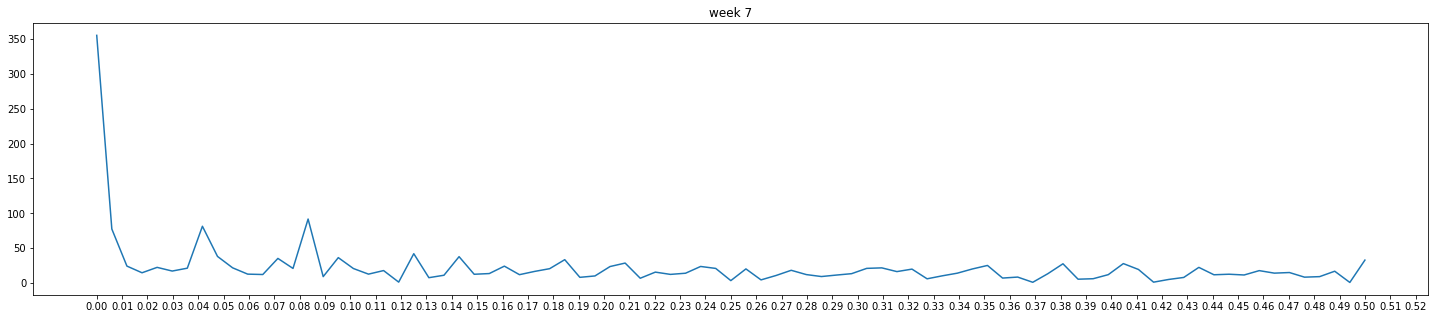

Largest magnitude period =  12.0  hours
Next largest magnitude periods in hours
[ 12.          24.         168.           8.          21.
   7.          10.5         14.           5.41935484]


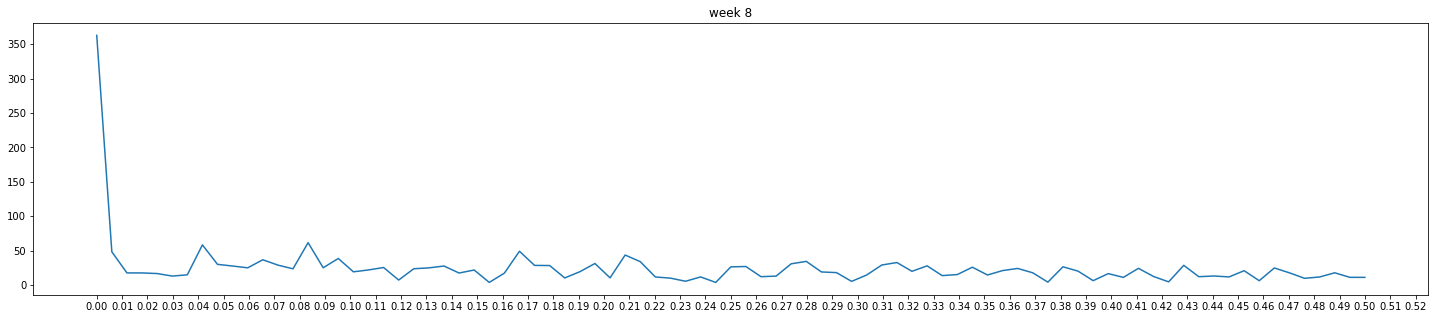

Largest magnitude period =  12.0  hours
Next largest magnitude periods in hours
[ 12.          24.           6.         168.           4.8
  10.5         15.27272727   3.57446809   4.66666667]


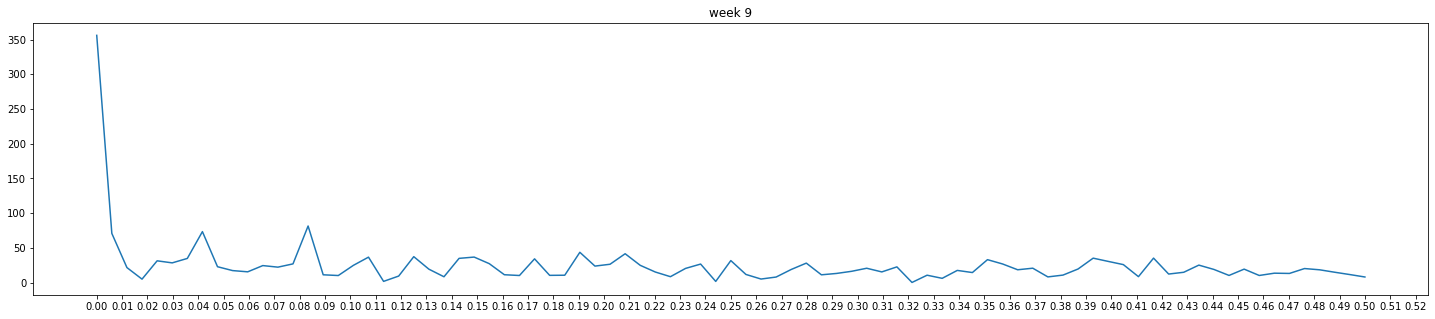

Largest magnitude period =  12.0  hours
Next largest magnitude periods in hours
[ 12.          24.         168.           5.25         4.8
   8.           6.72         9.33333333   2.4       ]


In [19]:
###### FFT plot of chosen time series every week ###### 

x = all_num_ts['clstr_'+chosen]

win_size = 168

for i in range(len(x)//win_size):
    x_week = x[i*win_size:(i+1)*win_size].to_numpy()

    ft = np.fft.rfft(x_week)
    freqs = np.fft.rfftfreq(len(x_week), 1) # Get frequency axis from the time axis
    mags = abs(ft) # We don't care about the phase information here
    plt.figure(figsize=(25,5))
    plt.xticks(np.arange(min(x_week), max(x_week)+1, 0.01))
    plt.plot(freqs, mags)
    plt.title('week '+ str(i+1))
    plt.show()

    inflection = np.diff(np.sign(np.diff(mags)))
    peaks = (inflection < 0).nonzero()[0] + 1
    peak = peaks[mags[peaks].argmax()]
    signal_freq = freqs[peak] #
    print('Largest magnitude period = ',1/signal_freq, ' hours')


    idx = np.argsort(-1*mags)
    print('Next largest magnitude periods in hours' )
    print(1/freqs[idx[1:10]])

###### FFT plot of chosen time series every week ###### 

In [20]:
col_names

dict_keys(['temp_clstr_175', 'hum_clstr_175', 'clstr_126', 'clstr_166', 'clstr_167', 'clstr_168', 'clstr_169', 'clstr_170', 'clstr_171', 'clstr_172', 'clstr_173', 'clstr_174', 'clstr_175', 'clstr_175_lag_168', 'clstr_175_lag_336'])

In [ ]:
###### Cross correlation plot of ALL demand time series ###### 
'''
# ########## calculate cross correlation between any 2 clusters ##########
# ## create all pairs of cluster demand_data in this region
# all_combi_idx = list(combinations(range(len(list(col_names))-3),2))
# all_demand_cols = list(col_names)[3:] # remove temp, hum, & wind speed
# for i,j in all_combi_idx:
#     ccf1 = sm.tsa.stattools.ccf( all_num_ts[all_demand_cols[i]],  all_num_ts[all_demand_cols[j]], adjusted=False)
#     print(f'correlation between {all_demand_cols[i]},and {all_demand_cols[j]}')
#     plt.plot(ccf1)
#     plt.show()
# ########## calculate cross correlation between any 2 clusters ##########
'''

# ########## calculate cross correlation between chosen cluster and other clusters ##########
all_other_dem_cols = list(col_names)[2:] # remove temp, hum, 
all_other_dem_cols.remove(chosen_clstr)
all_other_dem_cols.remove('clstr_'+chosen+'_lag_168')
all_other_dem_cols.remove('clstr_'+chosen+'_lag_336')

sum_ccf = {} # find which two series has the highest cross correaltion
first_nlags =168
for c in all_other_dem_cols:
    #calculate cross correlation between any 2 clusters
    ccf1 = sm.tsa.stattools.ccf( all_num_ts[chosen_clstr],  all_num_ts[c], adjusted=False)
    sum_ccf[c + " & " + chosen_clstr] = sum(abs(ccf1[:first_nlags]))
    print(f'correlation between {c},and {chosen_clstr} for {first_nlags} lags')
    plt.figure(figsize=(10,10))
    plt.plot(ccf1[:first_nlags])
    plt.show()
# ########## calculate cross correlation between chosen cluster and other clusters ##########

ccf_sorted = dict( sorted(sum_ccf.items(), key=operator.itemgetter(1),reverse=True))

new_covariate_clstr_columns = list(ccf_sorted.keys())[:2] # use the 2 largest CCF clusters as covariates for chosen cluster
new_covariate_clstr_columns = [new_covariate_clstr_columns[0].split(" &")[0] , new_covariate_clstr_columns[1].split(" &")[0]]
print(f'new covariate clusters columns: {new_covariate_clstr_columns}')
###### Cross correlation plot of ALL demand time series ###### 

In [22]:
all_num_ts.keys()

dict_keys(['temp_clstr_175', 'hum_clstr_175', 'clstr_126', 'clstr_166', 'clstr_167', 'clstr_168', 'clstr_169', 'clstr_170', 'clstr_171', 'clstr_172', 'clstr_173', 'clstr_174', 'clstr_175', 'clstr_175_lag_168', 'clstr_175_lag_336'])

In [ ]:
##################  Add inflow columns ################## 
tampines_region_inflow =  pd.read_csv('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM\\1_cluster_demand_prediction\data\demand_data\\tampines_region_inflow_medium_dataset.csv')
##################  Add inflow columns ################## 


################# Final numerical covariates and response time series  ###############
final_response_ts = {chosen_clstr:all_num_ts[chosen_clstr]}

final_num_covariate_ts = {'temp_clstr_175':temp_clstr_175,'hum_clstr_175':hum_clstr_175, \
new_covariate_clstr_columns[0]:all_num_ts[new_covariate_clstr_columns[0]],\
new_covariate_clstr_columns[1]:all_num_ts[new_covariate_clstr_columns[1]],\
'clstr_'+chosen+'_lag_168':all_num_ts['clstr_'+chosen+'_lag_168'],
'clstr_'+chosen+'_lag_336':all_num_ts['clstr_'+chosen+'_lag_336'],
chosen+'_inflow': tampines_region_inflow[chosen], chosen+'_lag_168'+'_inflow': tampines_region_inflow[chosen+'_lag_168'],\
chosen+'_lag_336'+'_inflow': tampines_region_inflow[chosen+'_lag_336'] }


print('final_response_ts', final_response_ts)
print('final_num_covariate_ts', final_num_covariate_ts)

with open("final_response_ts_tampines_medium_dataset.pkl",'wb') as f:
    pickle.dump(final_response_ts,f)

with open("final_num_covariate_ts_tampines_medium_dataset.pkl",'wb') as f:
    pickle.dump(final_num_covariate_ts,f)

################# Final numerical covariates and response time series  ###############


In [25]:
final_num_covariate_ts.keys()

dict_keys(['temp_clstr_175', 'hum_clstr_175', 'clstr_171', 'clstr_168', 'clstr_175_lag_168', 'clstr_175_lag_336', '175_inflow', '175_lag_168_inflow', '175_lag_336_inflow'])

In [26]:
###############
# TODO CHECK that each hour of any 24 hour random period can be modelled by a negative binomial distribution
# check the goodness of fit. 

################

In [27]:
################# Final categorical covariates time series  ###############
final_cat_covariate_ts = {"wea_desc_clstr_175":tampines_clstr_175__weather["wea_desc_clstr_175"].astype(dtype=str)}

with open("final_cat_covariate_ts_tampines_medium_dataset.pkl",'wb') as f:
    pickle.dump(final_cat_covariate_ts,f)
################# Final categorical covariates time series  ###############


In [209]:
with open("final_cat_covariate_ts_tampines_medium_dataset.pkl",'rb') as f:
    final_cat_covariate_ts = pickle.load(f)

final_cat_covariate_ts.keys()

dict_keys(['wea_desc_clstr_175'])